# torchkeras工具函数演示

除了以优雅的方式训练pytorch模型，torchkeras 还为算法工程师提供了一些非常实用的工具函数。

这些工具函数的使用非常简单，通常只要一行代码就可解决算法工程师常常遇到的一些技术需求，这里稍作演示。

例如：

* 1，根据关键词抓取百度图片

* 2，根据url下载github文件

* 3，根据url获取图片

* 4，matplotlib支持中文和负号显示

* 5，matplotlib图像转换成PIL图像

* 6，文本转PIL图像

* 7，发送邮件

* 8，探索性数据分析(EDA)

* 9，合并数据集文件夹

* 10，以彩色形式print



In [ ]:
!pip install -U torchkeras 

In [1]:
import sys 
sys.path.append("..")

## 1，根据关键词抓取百度图片

In [2]:
from  torchkeras.data import download_baidu_pictures 
download_baidu_pictures(keyword='猫咪', needed_pics_num=100, save_dir='cats')

753098 猫咪 pictures founded. start downloading 100 pictures...
100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]
saved 100 pictures in dir cats


## 2， 根据url下载github文件

In [2]:
from torchkeras.data import download_github_file 
download_github_file('https://github.com/lyhue1991/YOLOv8_tools/blob/main/wandb_callback.py')


  0%|          | 0.00/1.56k [00:00<?, ?B/s]

saved file: wandb_callback.py


'wandb_callback.py'

## 3，根据url获取图片

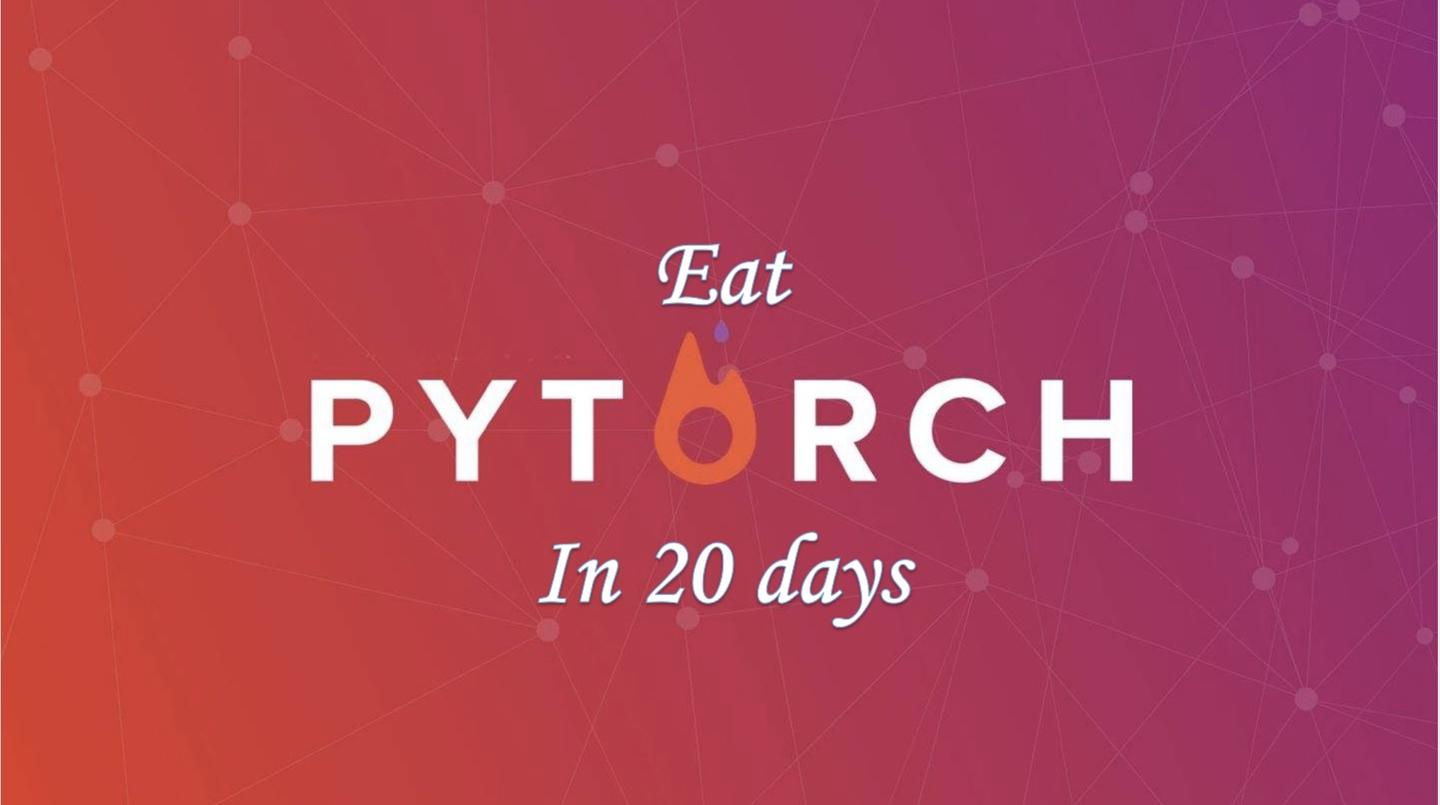

In [3]:
from torchkeras.data import download_image 
img = download_image('https://pic1.zhimg.com/v2-10423b9e7bfccf690d7a0d16189029dd_1440w.jpg?source=d16d100b')
img 

## 4， matplotlib支持中文和负号显示

set matplotlib font to SimHei and fontsize to 12


Text(0.5, 1.0, '正弦曲线')

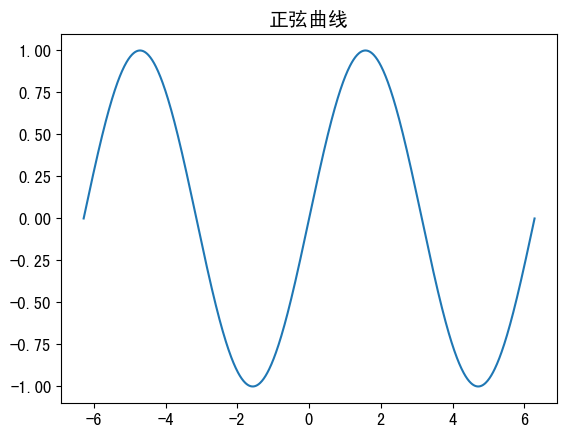

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

from torchkeras import plots 
plots.set_matplotlib_font(font_size=12) 

x = np.linspace(-2*np.pi,2*np.pi,1000)
y = np.sin(x)
plt.plot(x,y)
plt.title('正弦曲线')


## 5， matplotlib图像转换成PIL图像

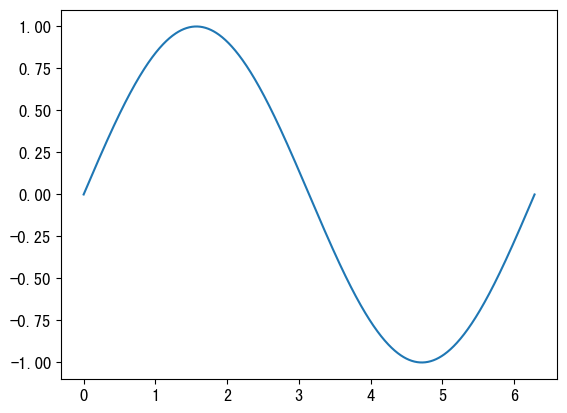

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
plt.plot(x,y)
fig = plt.gcf()

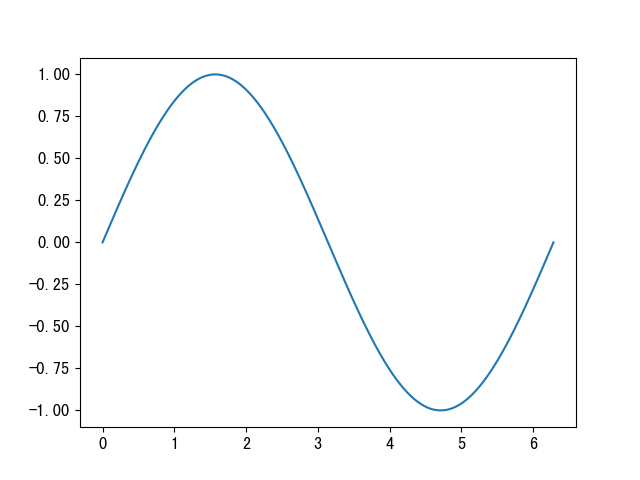

In [6]:
from torchkeras.plots import fig2img 
img = fig2img(fig)
img 

## 6，  文本转PIL图像

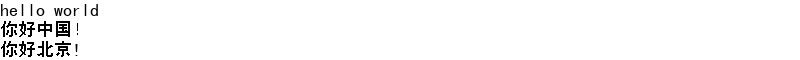

In [7]:
from torchkeras.utils import text_to_image
text_to_image('hello world\n你好中国！\n你好北京!')


## 7，发送邮件

In [8]:
from torchkeras.email import send_msg 
send_msg(receivers =['745554619@qq.com'],
         subject='hello', msg='hello world')


'send_msg success'

## 8，探索性数据分析(EDA)

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
from torchkeras.eda import pipeline 


breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data,columns = breast.feature_names)
df["label"] = breast.target
dftrain,dftest = train_test_split(df,test_size = 0.3)
dfeda = pipeline(dftrain,dftest)
dfeda 

start exploration data analysis...

================================================================================ 2023-04-13 17:43:37
step1: count features & samples...

train samples number : 398
test samples number : 171
features number : 30


================================================================================ 2023-04-13 17:43:37
step2: evaluate not nan ratio...



================================================================================ 2023-04-13 17:43:37
step3: evaluate not zero ratio...



================================================================================ 2023-04-13 17:43:37
step4: evaluate not negative ratio...



================================================================================ 2023-04-13 17:43:37
step5: evaluate classes count...




progress: 100%|██████████████████████████████| 31/31 [00:00<00:00, 15545.60it/s]



================================================================================ 2023-04-13 17:43:37
step6: evaluate most value...



================================================================================ 2023-04-13 17:43:37
step7: evaluate relativity(ks)...




progress: 100%|███████████████████████████████| 31/31 [00:00<00:00, 3898.40it/s]



================================================================================ 2023-04-13 17:43:37
step8: evaluate spearman cor...




progress: 100%|███████████████████████████████| 31/31 [00:00<00:00, 3716.87it/s]



================================================================================ 2023-04-13 17:43:37
step9: evaluate stability...




progress: 100%|███████████████████████████████| 31/31 [00:00<00:00, 4854.34it/s]


================================================================================ 2023-04-13 17:43:37
tast end...





,非空率,非空非零率,非空非零非负1率,取值类别数,众数,相关性ks,相关性cor,同分布性
mean radius,1.0,1.000000,1.000000,341,10.260000,0.744644,-0.733085,0.945884
mean texture,1.0,1.000000,1.000000,351,15.700000,0.467491,-0.464521,0.932308
mean perimeter,1.0,1.000000,1.000000,372,61.490000,0.770384,-0.747009,0.943416
mean area,1.0,1.000000,1.000000,384,512.200000,0.747969,-0.733015,0.940859
mean smoothness,1.0,1.000000,1.000000,350,0.105400,0.362951,-0.375263,0.910180
mean compactness,1.0,1.000000,1.000000,376,0.114700,0.590423,-0.586250,0.939581
mean concavity,1.0,0.979899,0.979899,380,0.000000,0.755664,-0.727835,0.935643
mean concave points,1.0,0.979899,0.979899,383,0.000000,0.830362,-0.778717,0.952878
mean symmetry,1.0,1.000000,1.000000,318,0.160100,0.321474,-0.347029,0.945693
mean fractal dimension,1.0,1.000000,1.000000,367,0.059130,0.149315,0.054803,0.950601


## 9，合并数据集文件夹

图像任务相关的数据集通常会整理成文件夹形式，例如yolo格式。有时候我们会以增量的形式不断地新做一些数据。

有没有什么办法可以快速地把新的数据集文件夹和老的数据集文件夹方便的合并呢？

In [11]:
from pathlib import Path 
for folder in ['ds1','ds2']:
    for  tp in ['images','labels']:
        for part in ['train','val']:
            path = Path(folder)/tp/part
            path.mkdir(parents=True, exist_ok=True)
            for i in range(3):
                if tp=='images':
                    (path/f'{i}.jpeg').touch()
                else:
                    (path/f'{i}.txt').touch()

In [12]:
from torchkeras.data import merge_dataset_folders 
from_folders = ['ds1','ds2']
to_folder = 'ds_merge'
merge_dataset_folders(from_folders,to_folder)


before merge:
ds1: 12 files
ds2: 12 files

after merge:
ds_merge: 24 files


'ds_merge'

## 10，以彩色形式print 

In [13]:
from torchkeras.utils import colorful 
print(colorful('helloworld'))
print(colorful('helloworld',color='blue'))

helloworld
helloworld
